#### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
raw_data = pd.read_csv('1553768847-housing.csv')
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
raw_data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN,264725.000000


#### Visualizing the data

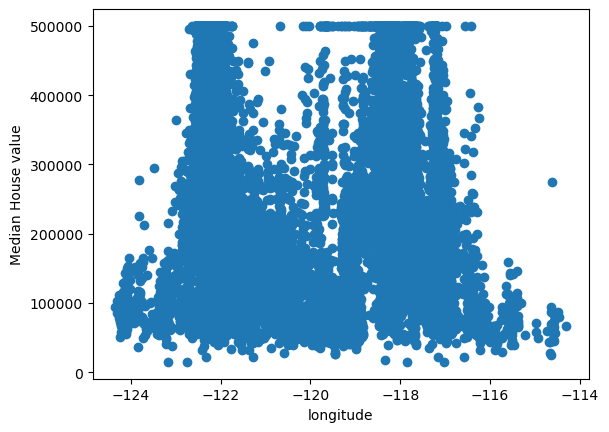

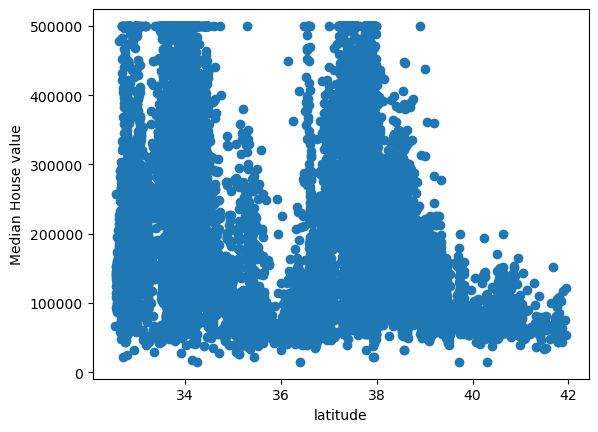

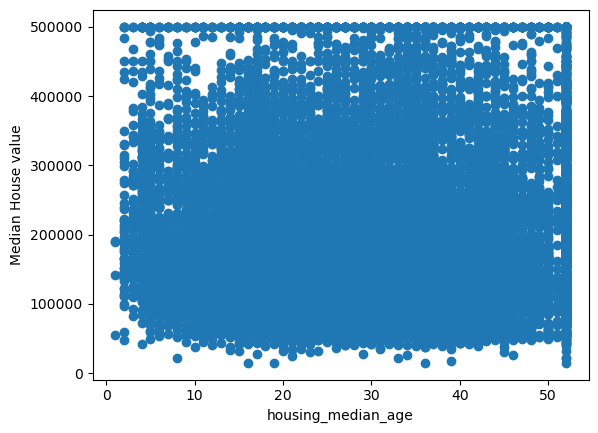

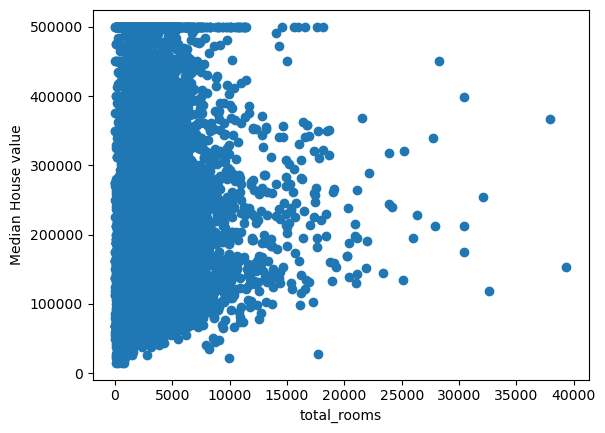

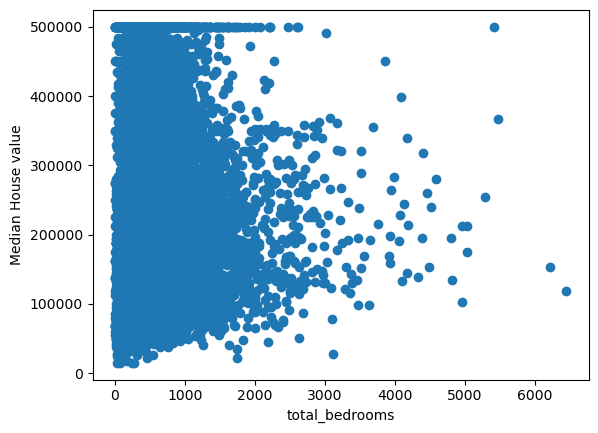

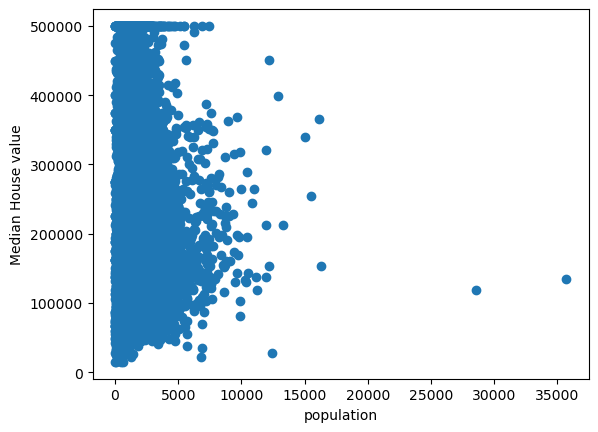

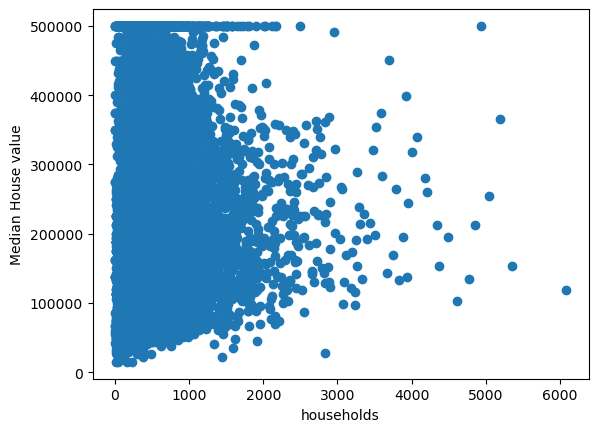

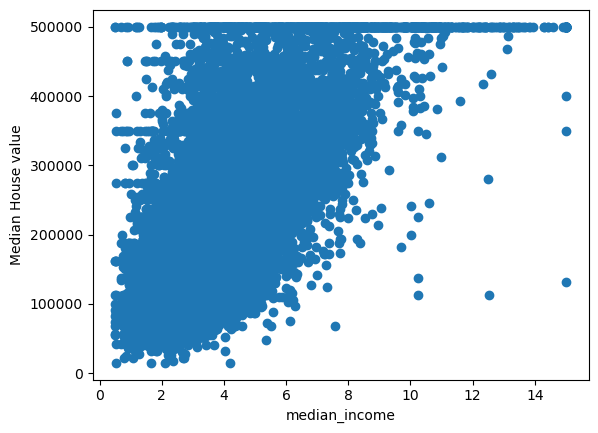

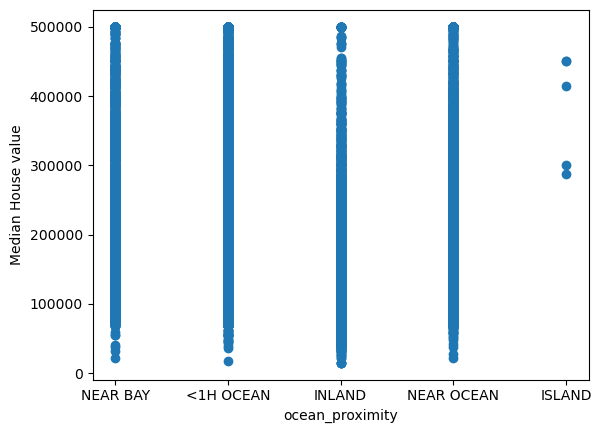

In [4]:
for col in raw_data:
    if col != 'median_house_value':
        plt.scatter(raw_data[col], raw_data['median_house_value'])
        plt.xlabel(col, size=10, color='black')
        plt.ylabel('Median House value', size=10, color='black')
        plt.show()

#### Checking null values

In [5]:
print("Null values are:\n\n", raw_data.isnull().sum())

Null values are:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [6]:
# Replacing null values with its mean
raw_data['total_bedrooms'].fillna(raw_data['total_bedrooms'].mean(), inplace=True)
raw_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

#### Replacing categorical data type with numerical value

In [8]:
def detect_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns
def encode_categorical_columns(df):
    categorical_columns = detect_categorical_columns(df)
    le = LabelEncoder()
    df_encoded = df.copy()

    for col in categorical_columns:
        df_encoded[col] = df[col].astype(str)  
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

df_encoded = encode_categorical_columns(raw_data)
df_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


#### Correlation matrix

<AxesSubplot:>

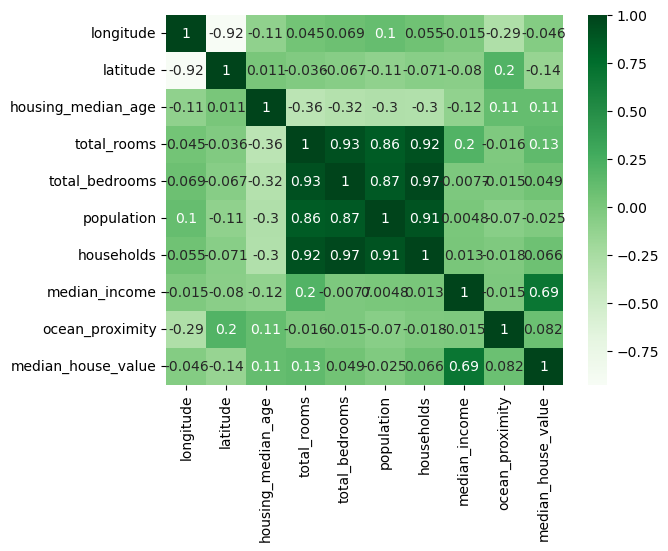

In [9]:
matrix = df_encoded.corr()
sns.heatmap(matrix, cmap="Greens", annot=True, xticklabels=True, yticklabels=True)

#### Splitting the dataset into inputs and targets

In [10]:
inputs = df_encoded.drop('median_house_value', axis=1, inplace=False)
targets = df_encoded['median_house_value']

#### Splitting the inputs into train test subsets

In [11]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)

#### Scaling the inputs dataset

In [12]:
scaled_inputs_train = preprocessing.scale(inputs_train)
scaled_inputs_test = preprocessing.scale(inputs_test)

#### Building Linear Regression model

In [13]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(scaled_inputs_train, targets_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

linear_reg_mse_train = mean_squared_error(targets_train, linear_reg.predict(scaled_inputs_train))
linear_reg_r2_train = r2_score(targets_train, linear_reg.predict(scaled_inputs_train)) * 100

linear_reg_mse_test = mean_squared_error(targets_test, linear_reg.predict(scaled_inputs_test))
linear_reg_r2_test = r2_score(targets_test, linear_reg.predict(scaled_inputs_test)) * 100

linear_reg_intercept = linear_reg.intercept_
linear_reg_coef = linear_reg.coef_

#### Building ridge model

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {
    'alpha': [1, 10, 100, 1000]
         }
ridge = Ridge(copy_X=True)
ridge_gcv = GridSearchCV(estimator=ridge, param_grid=ridge_params)
ridge_gcv.fit(scaled_inputs_train, targets_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [1, 10, 100, 1000]})

In [16]:
ridge_model = ridge_gcv.best_estimator_
ridge_model.fit(scaled_inputs_train, targets_train)

Ridge(alpha=10)

In [17]:
ridge_mse_train = mean_squared_error(targets_train, ridge_model.predict(scaled_inputs_train))
ridge_r2_train = r2_score(targets_train, ridge_model.predict(scaled_inputs_train)) * 100

ridge_mse_test = mean_squared_error(targets_test, ridge_model.predict(scaled_inputs_test))
ridge_r2_test = r2_score(targets_test, ridge_model.predict(scaled_inputs_test)) * 100

ridge_intercept = ridge_model.intercept_
ridge_coef = ridge_model.coef_

#### Building lasso regression model

In [18]:
from sklearn.linear_model import Lasso

lasso_params = {
    'alpha': [1, 10, 100, 1000]
         }

lasso = Lasso(copy_X=True)
lasso_gcv = GridSearchCV(estimator=lasso,param_grid=lasso_params)
lasso_gcv.fit(scaled_inputs_train, targets_train)

GridSearchCV(estimator=Lasso(), param_grid={'alpha': [1, 10, 100, 1000]})

In [19]:
lasso_model = lasso_gcv.best_estimator_
lasso_model.fit(scaled_inputs_train, targets_train)

Lasso(alpha=100)

In [20]:
lasso_mse_train = mean_squared_error(targets_train, lasso_model.predict(scaled_inputs_train))
lasso_r2_train = r2_score(targets_train, lasso_model.predict(scaled_inputs_train)) * 100

lasso_mse_test = mean_squared_error(targets_test, lasso_model.predict(scaled_inputs_test))
lasso_r2_test = r2_score(targets_test, lasso_model.predict(scaled_inputs_test)) * 100

lasso_intercept = lasso_model.intercept_
lasso_coef = lasso_model.coef_

#### Building Decission Tree model

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {
    'max_depth': [2,4,6,8,10,12],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2]}
dt = DecisionTreeRegressor()
dt_gcv = GridSearchCV(estimator=dt,param_grid=dt_params)
dt_gcv.fit(scaled_inputs_train, targets_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [22]:
dt_model = dt_gcv.best_estimator_
dt_model.fit(scaled_inputs_train, targets_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)

In [23]:
dt_mse_train = mean_squared_error(targets_train, dt_model.predict(scaled_inputs_train))
dt_r2_train = r2_score(targets_train, dt_model.predict(scaled_inputs_train)) * 100

dt_mse_test = mean_squared_error(targets_test, dt_model.predict(scaled_inputs_test))
dt_r2_test = r2_score(targets_test, dt_model.predict(scaled_inputs_test)) * 100

#### Building Random Forest Regression model

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [2,4,6,8,10,12],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2]
}
rf = RandomForestRegressor(random_state=1)
rf_gcv = GridSearchCV(estimator=rf, param_grid=rf_params)
rf_gcv.fit(scaled_inputs_train, targets_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20, 30]})

In [25]:
rf_model = rf_gcv.best_estimator_
rf_model.fit(scaled_inputs_train, targets_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, n_estimators=30,
                      random_state=1)

In [26]:
rf_mse_train = mean_squared_error(targets_train, rf_model.predict(scaled_inputs_train))
rf_r2_train = r2_score(targets_train, rf_model.predict(scaled_inputs_train)) * 100

rf_mse_test = mean_squared_error(targets_test, rf_model.predict(scaled_inputs_test))
rf_r2_test = r2_score(targets_test, rf_model.predict(scaled_inputs_test)) * 100

#### Creating a df to visualize the accuracy of each model

In [28]:
model_summary = pd.DataFrame({'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest'],
                              'Mean Squared Error Train': [linear_reg_mse_train, ridge_mse_train, lasso_mse_train, dt_mse_train, rf_mse_train],
                              'R2 Train': [linear_reg_r2_train, ridge_r2_train, lasso_r2_train, dt_r2_train, rf_r2_train],
                              'Mean Squared Error Test': [linear_reg_mse_test, ridge_mse_test, lasso_mse_test, dt_mse_test, rf_mse_test],
                              'R2 Test': [linear_reg_r2_test, ridge_r2_test, lasso_r2_test, dt_r2_test, rf_r2_test],
                              'Intercept': [linear_reg_intercept, ridge_intercept, lasso_intercept, None, None],
                              'Slope1': [linear_reg_coef[0], ridge_coef[0], lasso_coef[0], None, None],
                              'Slope2': [linear_reg_coef[1], ridge_coef[1], lasso_coef[1], None, None],
                              'Slope3': [linear_reg_coef[2], ridge_coef[2], lasso_coef[2], None, None],
                              'Slope4': [linear_reg_coef[3], ridge_coef[3], lasso_coef[3], None, None],
                              'Slope5': [linear_reg_coef[4], ridge_coef[4], lasso_coef[4], None, None],
                              'Slope6': [linear_reg_coef[5], ridge_coef[5], lasso_coef[5], None, None],
                              'Slope7': [linear_reg_coef[6], ridge_coef[6], lasso_coef[6], None, None],
                              'Slope8': [linear_reg_coef[7], ridge_coef[7], lasso_coef[7], None, None],
                              'Slope9': [linear_reg_coef[8], ridge_coef[8], lasso_coef[8], None, None],
                             })
model_summary

,Model,Mean Squared Error Train,R2 Train,Mean Squared Error Test,R2 Test,Intercept,Slope1,Slope2,Slope3,Slope4,Slope5,Slope6,Slope7,Slope8,Slope9
0,Linear Regression,4.845283e+09,63.736401,4.892036e+09,62.704349,207735.064196,-85719.624193,-90753.201594,14624.243116,-15959.374146,37190.050302,-43836.231637,27376.374294,76258.386255,609.712580
1,Ridge,4.845384e+09,63.735644,4.891507e+09,62.708384,207735.064196,-84628.841011,-89699.080022,14692.259305,-14255.698871,35671.334554,-43142.833740,26607.647883,75920.227785,637.979101
2,Lasso,4.845993e+09,63.731093,4.890501e+09,62.716054,207735.064196,-84628.841011,-89699.080022,14692.259305,-14255.698871,35671.334554,-43142.833740,26607.647883,75920.227785,637.979101
3,Decision Tree,2.147504e+09,83.927417,3.937523e+09,69.981317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Random Forest,1.251671e+09,90.632108,2.742304e+09,79.093370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
